In [1]:
# This notebook uses Python 3

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os


In [2]:
PATH_BASE = os.getcwd()
#print("PATH_BASE = ", PATH_BASE)

os.chdir( "../../figs")
PATH_FIGS = os.getcwd()
#print("PATH_FIGS = ", PATH_FIGS )

os.chdir( PATH_BASE )
os.chdir( "../libs")
PATH_LIBS = os.getcwd()
#print("PATH_LIBS = ", PATH_LIBS )

# re-set path back to base
os.chdir( PATH_BASE )
#print("Currently in: ", os.getcwd() )


In [3]:
# Libraries created by MZ
os.chdir( PATH_LIBS )

import plotting as pg
import costgrad_vec as cg
import common as nc
import algos_vec as ao
import params as pm

os.chdir( PATH_BASE )


# ==================== EXPERIMENT ======================

In [4]:
nom = cg.get_cost_names()
print(nom)
name = nom[4]
print("name = ", name)

p_init = cg.get_p_init(name)
print("p_init = ", p_init)

p_target = cg.get_p_target(name)
print("p_target = ", p_target)

# parameters ----------------------------
num      = 1200
b_print  = True
rho_targ = 0.1

# Increase alpha by a factor of i_factor at i = i_manual.  To skip this, set i<0
i_manual = -1
i_factor = 1

#g_rho_type = "original"
g_rho_type = "new"

# Definition of rho --------------
print("g_rho_type = ", g_rho_type)

# for sumd plot ---------------
g_sumd_line_freq = 20


['x^2', 'x^4', 'ellipse', '1Dsigwell', '2Dshell', 'Beale']
name =  2Dshell
p_init =  [4. 1.]
p_target =  [-3.  0.]
g_rho_type =  new


### GD

In [5]:
# =======================================================
type_opt = "dp_GD_basic" 
#type_opt = "dp_GD_momentum"
#type_opt = "dp_GD_Nesterov"
#type_opt = "dp_RMSProp"
#type_opt = "dp_Adam" 

alpha, num1 = pm.get_alpha_num( name, type_opt )
print("new values: alpha,num1 = ", alpha, num1)


new values: alpha,num1 =  0.1 1200


In [6]:
d_res_GD = ao.do_GDFamily(name, alpha, num, p_init.copy(), p_target, type_opt, rho_targ, b_print, i_manual, i_factor, g_rho_type )


cost_old =  1.0399999984433768
1: cost,rho,dotp = 1.03997999829124, 4.5740838634248206e-08, 0.9999999999999996
2: cost,rho,dotp = 1.0399699982124195, 4.687324883916808e-08, 1.0
3: cost,rho,dotp = 1.0399599981317058, 4.798345413440469e-08, 0.9999999999999998
4: cost,rho,dotp = 1.039949998049054, 4.91158630707053e-08, 0.9999999999999998
5: cost,rho,dotp = 1.0399399979644186, 5.027047561560932e-08, 0.9999999999999998
6: cost,rho,dotp = 1.0399299978777516, 5.149170027061285e-08, 0.9999999999999996
7: cost,rho,dotp = 1.0399199977890057, 5.266851565038963e-08, 0.9999999999999996
8: cost,rho,dotp = 1.0399099976981308, 5.39563515801365e-08, 0.9999999999999993
9: cost,rho,dotp = 1.0398999976050767, 5.522198243130437e-08, 0.9999999999999996
10: cost,rho,dotp = 1.0398899975097917, 5.653202094469641e-08, 0.9999999999999996
11: cost,rho,dotp = 1.039879997412223, 5.788646706418206e-08, 0.9999999999999996
12: cost,rho,dotp = 1.0398699973123164, 5.924091224774796e-08, 0.9999999999999998
13: cost,rho,d

629: cost,rho,dotp = 0.08200686651568598, 0.00015941332044415465, 0.9999999954980311
630: cost,rho,dotp = 0.08200605165059266, 0.00015940879250527334, 0.9999999954951564
631: cost,rho,dotp = 0.08200523626583353, 0.00015940427654407855, 0.9999999954922859
632: cost,rho,dotp = 0.0820044203610919, 0.0001593997725131112, 0.9999999954894094
633: cost,rho,dotp = 0.08200360393605091, 0.0001593952463549825, 0.9999999954865342
634: cost,rho,dotp = 0.08200278699039351, 0.00015939074905779008, 0.999999995483655
635: cost,rho,dotp = 0.08200196952380254, 0.0001593861956400087, 0.999999995480776
636: cost,rho,dotp = 0.08200115153596056, 0.00015938168798980106, 0.9999999954778941
637: cost,rho,dotp = 0.08200033302655005, 0.00015937715816192286, 0.9999999954750101
638: cost,rho,dotp = 0.08199951399525325, 0.00015937264006259875, 0.9999999954721255
639: cost,rho,dotp = 0.08199869444175228, 0.00015936809977018775, 0.9999999954692381
640: cost,rho,dotp = 0.08199787436572906, 0.00015936355421986408, 0.999

max index =  1200
final arclength (sumd_x) =  1.5162868699515224
final distance (sumd_y) =  1.1752319726306393


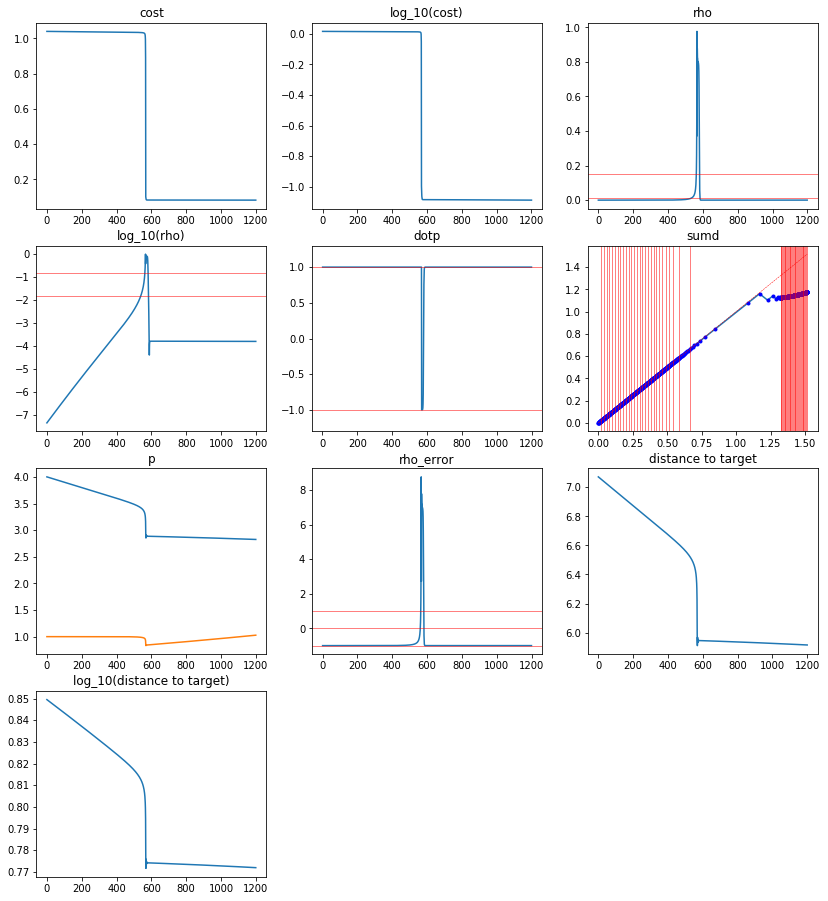

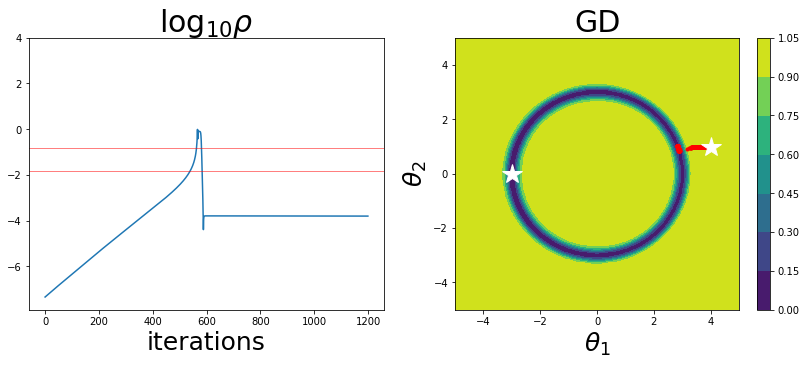

In [7]:
pg.do_Plots_final(d_res_GD, pm.g_rhomin, pm.g_rhomax, g_sumd_line_freq)
#pg.do_plot_special(name, d_res_GD)

filename = None
pg.do_plot_2Dshell_special(name, d_res_GD, "GD", filename, pm.g_ymin_2Dshell, pm.g_ymax_2Dshell)


### GDM

In [8]:
# =======================================================
#type_opt = "dp_GD_basic"  
type_opt = "dp_GD_momentum"
#type_opt = "dp_GD_Nesterov"
#type_opt = "dp_RMSProp"
#type_opt = "dp_Adam" 

alpha, num1 = pm.get_alpha_num( name, type_opt )
print("new values: alpha,num1 = ", alpha, num1)


new values: alpha,num1 =  0.7 1200


In [9]:
d_res_GDM = ao.do_GDFamily(name, alpha, num, p_init.copy(), p_target, type_opt, rho_targ, b_print, i_manual, i_factor, g_rho_type )


cost_old =  1.0399999984433768
1: cost,rho,dotp = 1.0398599972751377, 3.8687285229873835e-07, 0.999999999999996
2: cost,rho,dotp = 1.0397899965635908, 4.55778188491749e-07, 0.9999999999999946
3: cost,rho,dotp = 1.0397199957473748, 5.367948906991375e-07, 0.9999999999999927
4: cost,rho,dotp = 1.03964999480848, 6.32022814429923e-07, 0.9999999999999901
5: cost,rho,dotp = 1.039579993725783, 7.439207444367937e-07, 0.9999999999999867
6: cost,rho,dotp = 1.0395099924745101, 8.753668659976551e-07, 0.9999999999999819
7: cost,rho,dotp = 1.0394399910256107, 1.0297292572468877e-06, 0.9999999999999755
8: cost,rho,dotp = 1.0393699893450228, 1.2109480120221588e-06, 0.9999999999999666
9: cost,rho,dotp = 1.0392999873928133, 1.423630991935453e-06, 0.9999999999999546
10: cost,rho,dotp = 1.0392299851221745, 1.6731652885613438e-06, 0.9999999999999382
11: cost,rho,dotp = 1.0391599824782483, 1.9658470415245257e-06, 0.9999999999999156
12: cost,rho,dotp = 1.0390899793967547, 2.3090325281557237e-06, 0.99999999999

615: cost,rho,dotp = 0.07177436542315475, 0.0006966078295977728, 0.9999983748587549
616: cost,rho,dotp = 0.07173162769852647, 0.0006949535281813466, 0.9999983701375688
617: cost,rho,dotp = 0.07168876748646145, 0.0006932944816317083, 0.999998365412981
618: cost,rho,dotp = 0.07164578471007778, 0.0006916306871766107, 0.9999983606851178
619: cost,rho,dotp = 0.07160267929464856, 0.0006899621414254487, 0.9999983559539631
620: cost,rho,dotp = 0.07155945116761724, 0.0006882888410518312, 0.9999983512194809
621: cost,rho,dotp = 0.07151610025861264, 0.0006866107833488855, 0.999998346481748
622: cost,rho,dotp = 0.07147262649946429, 0.0006849279659925683, 0.9999983417409477
623: cost,rho,dotp = 0.07142902982421748, 0.0006832403868646555, 0.9999983369972468
624: cost,rho,dotp = 0.07138531016914854, 0.0006815480432678008, 0.9999983322507027
625: cost,rho,dotp = 0.07134146747277983, 0.0006798509322523997, 0.9999983275013036
626: cost,rho,dotp = 0.07129750167589491, 0.0006781490515322936, 0.99999832274

max index =  1200
final arclength (sumd_x) =  10.780933799017020513
final distance (sumd_y) =  5.88192936071567687


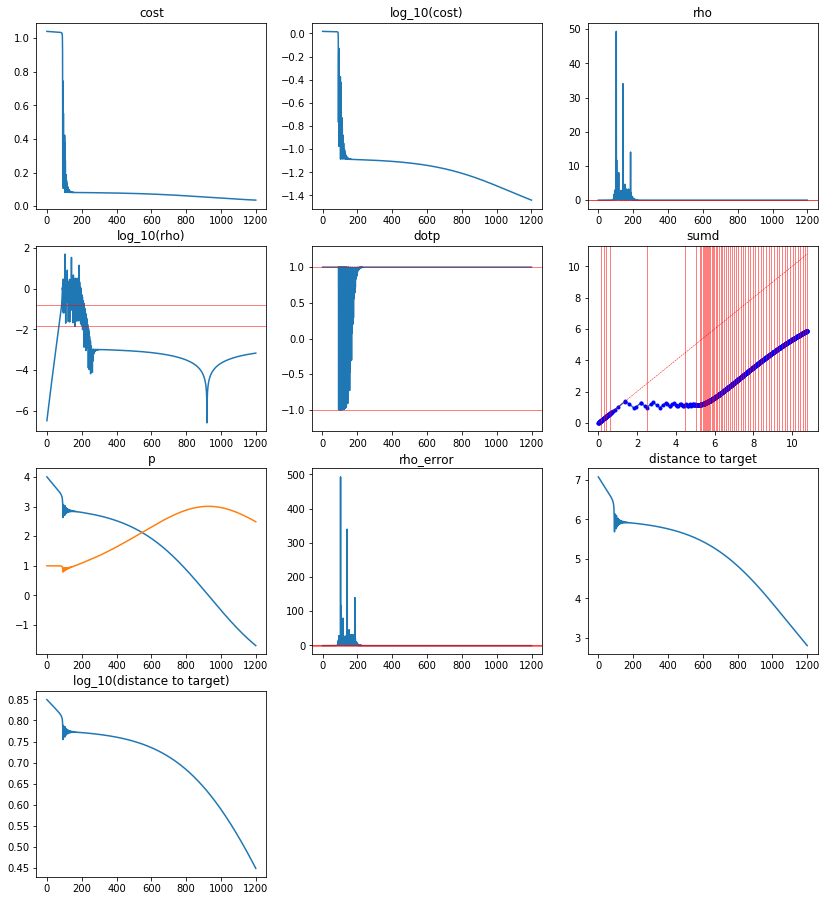

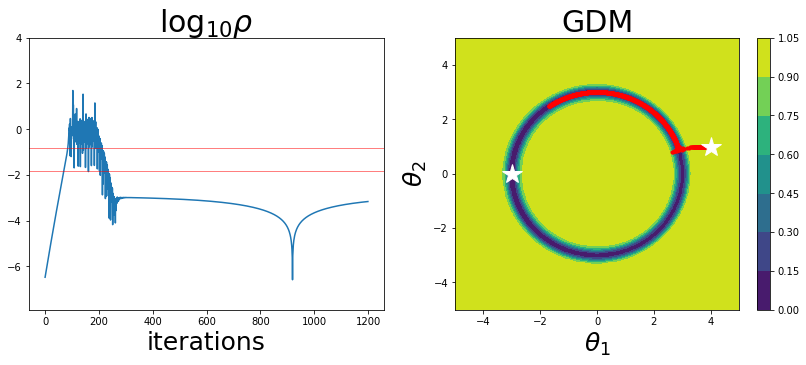

In [10]:
pg.do_Plots_final(d_res_GDM, pm.g_rhomin, pm.g_rhomax, g_sumd_line_freq)
#pg.do_plot_special(name, d_res_GDM)

#filename = None
filename = PATH_FIGS + "/2Dshell-GDM"
pg.do_plot_2Dshell_special(name, d_res_GDM, "GDM", filename, pm.g_ymin_2Dshell, pm.g_ymax_2Dshell)


### RMSProp

In [11]:
# =======================================================
#type_opt = "dp_GD_basic" 
#type_opt = "dp_GD_momentum"
#type_opt = "dp_GD_Nesterov"
type_opt = "dp_RMSProp"
#type_opt = "dp_Adam" 

alpha, num1 = pm.get_alpha_num( name, type_opt )
print("new values: alpha,num1 = ", alpha, num1)


new values: alpha,num1 =  0.01 1200


In [12]:
d_res_RMSProp = ao.do_GDFamily(name, alpha, num, p_init.copy(), p_target, type_opt, rho_targ, b_print, i_manual, i_factor, g_rho_type )


cost_old =  1.0399999984433768
1: cost,rho,dotp = 1.0398000074366218, 6.074351822104557e-07, 0.9999999996799881
2: cost,rho,dotp = 1.0397000116419348, 7.674498899016734e-07, 0.9999999994860542
3: cost,rho,dotp = 1.0396000155771088, 9.690289906411653e-07, 0.9999999991755878
4: cost,rho,dotp = 1.0395000191657124, 1.2228154438462966e-06, 0.9999999986791669
5: cost,rho,dotp = 1.0394000223107902, 1.542138597944014e-06, 0.9999999978863708
6: cost,rho,dotp = 1.0393000248895092, 1.9436830540276716e-06, 0.9999999966217802
7: cost,rho,dotp = 1.0392000267464387, 2.448322153108276e-06, 0.999999994607048
8: cost,rho,dotp = 1.0391000276851223, 3.0821564523522364e-06, 0.9999999914010314
9: cost,rho,dotp = 1.0390000274575093, 3.877807457314563e-06, 0.9999999863053999
10: cost,rho,dotp = 1.0389000257507162, 4.876029547691106e-06, 0.9999999782159771
11: cost,rho,dotp = 1.0388000221704479, 6.127718799360387e-06, 0.9999999653888715
12: cost,rho,dotp = 1.0387000162202442, 7.69641777574323e-06, 0.9999999450

578: cost,rho,dotp = 0.08313268325110502, 0.0005636167015412527, 0.9999999939167908
579: cost,rho,dotp = 0.08313237961114237, 0.0005640591261897842, 0.9999999938901989
580: cost,rho,dotp = 0.08313207494019642, 0.0005645004174718637, 0.9999999938635009
581: cost,rho,dotp = 0.08313176923466932, 0.0005649406186873647, 0.9999999938366968
582: cost,rho,dotp = 0.0831314624909501, 0.0005653797027468103, 0.9999999938097854
583: cost,rho,dotp = 0.08313115470541473, 0.000565817652352212, 0.999999993782767
584: cost,rho,dotp = 0.08313084587442593, 0.0005662545148735307, 0.9999999937556412
585: cost,rho,dotp = 0.08313053599433336, 0.0005666902463913047, 0.9999999937284069
586: cost,rho,dotp = 0.08313022506147336, 0.0005671248453353239, 0.9999999937010644
587: cost,rho,dotp = 0.08312991307216906, 0.0005675583353219575, 0.9999999936736131
588: cost,rho,dotp = 0.08312960002273027, 0.0005679906674173689, 0.9999999936460523
589: cost,rho,dotp = 0.08312928590945343, 0.0005684219175703542, 0.999999993618

max index =  1200
final arclength (sumd_x) =  1.9181463254505618253
final distance (sumd_y) =  1.1190299828576512017


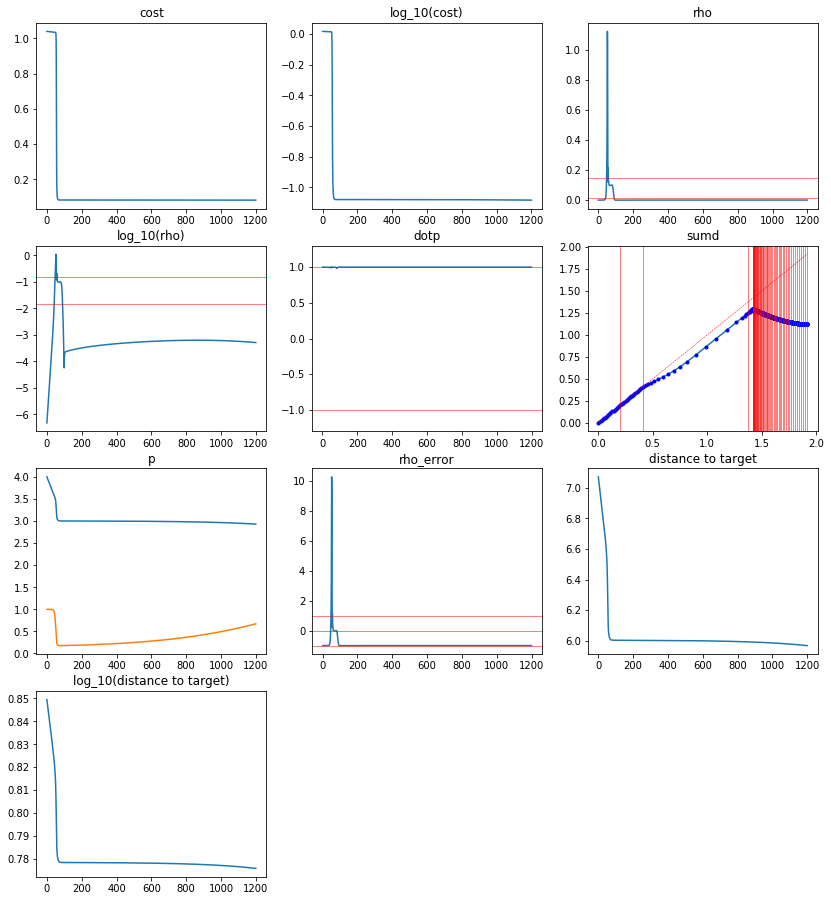

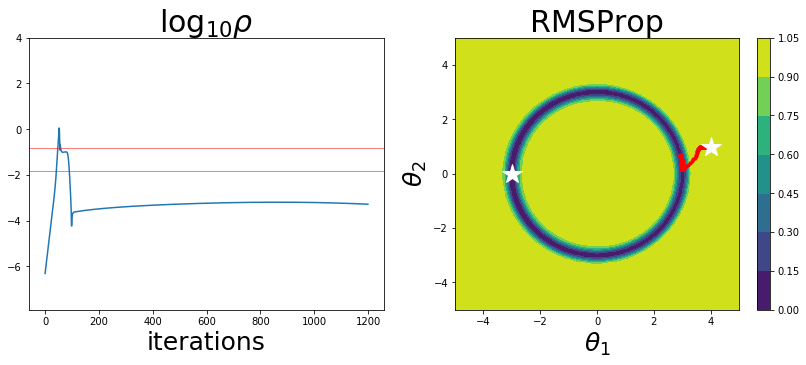

In [13]:
pg.do_Plots_final(d_res_RMSProp, pm.g_rhomin, pm.g_rhomax, g_sumd_line_freq)
#pg.do_plot_special(name, d_res_RMSProp)

#filename = None
filename = PATH_FIGS + "/2Dshell-RMS"
pg.do_plot_2Dshell_special(name, d_res_RMSProp, "RMSProp", filename, pm.g_ymin_2Dshell, pm.g_ymax_2Dshell)


### Adam

In [14]:
# =======================================================
#type_opt = "dp_GD_basic"  
#type_opt = "dp_GD_momentum"
#type_opt = "dp_GD_Nesterov"
#type_opt = "dp_RMSProp"
type_opt = "dp_Adam" 

alpha, num1 = pm.get_alpha_num( name, type_opt )
print("new values: alpha,num1 = ", alpha, num1)


new values: alpha,num1 =  0.15 1200


In [15]:
d_res_Adam = ao.do_GDFamily(name, alpha, num, p_init.copy(), p_target, type_opt, rho_targ, b_print, i_manual, i_factor, g_rho_type )


cost_old =  1.0399999984433768
1: cost,rho,dotp = 1.0369985515900486, 0.0009038707191267621, 0.999998667709785
2: cost,rho,dotp = 1.035457028256027, 0.023948466522666894, 0.9994026904464721
3: cost,rho,dotp = 1.0325075981708727, 0.7763928207505597, 0.9189808150685912
4: cost,rho,dotp = 1.0020060740827585, 4.1232092843391, 0.9914414682952374
5: cost,rho,dotp = 0.8312990953280439, 1.6794751863249922, 0.9826587360718139
6: cost,rho,dotp = 0.3702270871146151, 0.3651093684653812, 0.9996652732177018
7: cost,rho,dotp = 0.09167099323139624, 0.4806936250103079, 0.9999933381981392
8: cost,rho,dotp = 0.14550170961377334, 1.8187045649578066, 0.9999819310227154
9: cost,rho,dotp = 0.3450571626813012, 0.622280611259576, 0.9985637087531226
10: cost,rho,dotp = 0.3947734957367049, 0.024328604600503918, 0.8950402503306737
11: cost,rho,dotp = 0.28853856865691513, 0.07915173109359523, -0.22431480475205687
12: cost,rho,dotp = 0.15261448259271618, 0.2372629852007887, 0.9248302641573172
13: cost,rho,dotp = 0.

617: cost,rho,dotp = 0.08030675096017263, 0.0009514146721213558, 0.9999982439398902
618: cost,rho,dotp = 0.08028233484310629, 0.0009441865851098216, 0.9999982397140124
619: cost,rho,dotp = 0.08025779440755476, 0.0009370051620129112, 0.9999982355390677
620: cost,rho,dotp = 0.08023312978880631, 0.0009298704373627658, 0.9999982314148721
621: cost,rho,dotp = 0.08020834112597253, 0.0009227824367055201, 0.9999982273412305
622: cost,rho,dotp = 0.0801834285619158, 0.000915741175861833, 0.9999982233179351
623: cost,rho,dotp = 0.0801583922431769, 0.0009087466614483172, 0.999998219344772
624: cost,rho,dotp = 0.0801332323199028, 0.0009017988911270145, 0.9999982154215225
625: cost,rho,dotp = 0.08010794894577469, 0.0008948978536293584, 0.9999982115479608
626: cost,rho,dotp = 0.08008254227793632, 0.0008880435291127008, 0.99999820772385
627: cost,rho,dotp = 0.08005701247692261, 0.0008812358892233766, 0.9999982039489431
628: cost,rho,dotp = 0.08003135970658853, 0.0008744748970458962, 0.9999982002229881

max index =  1200
final arclength (sumd_x) =  8.92384472015526567
final distance (sumd_y) =  4.461602317014017323


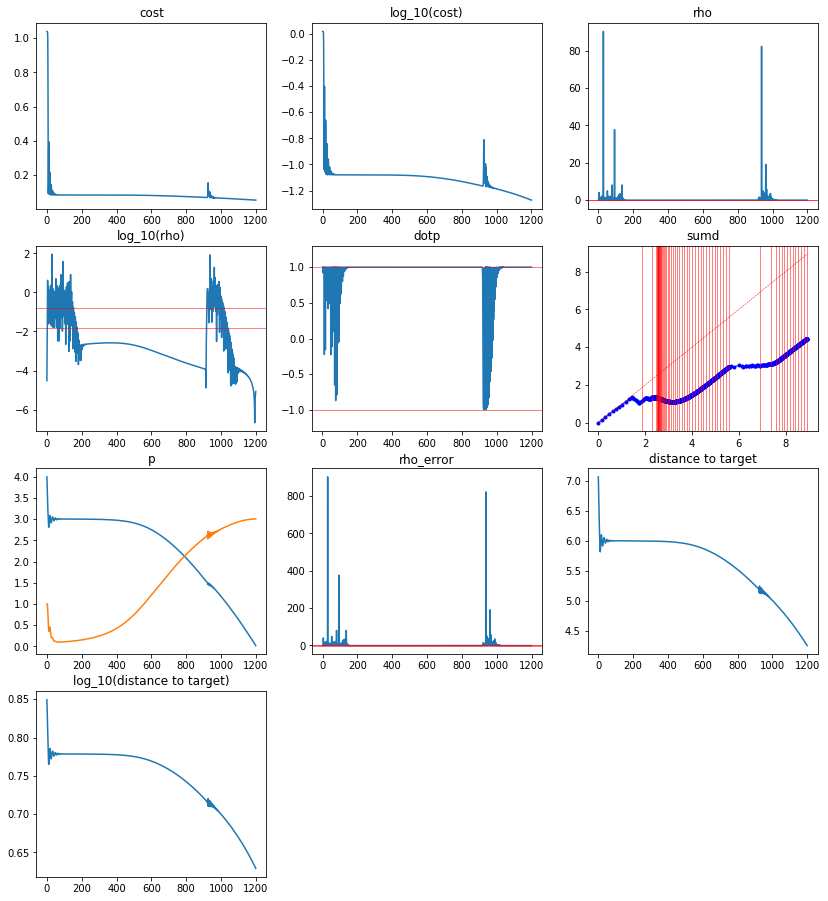

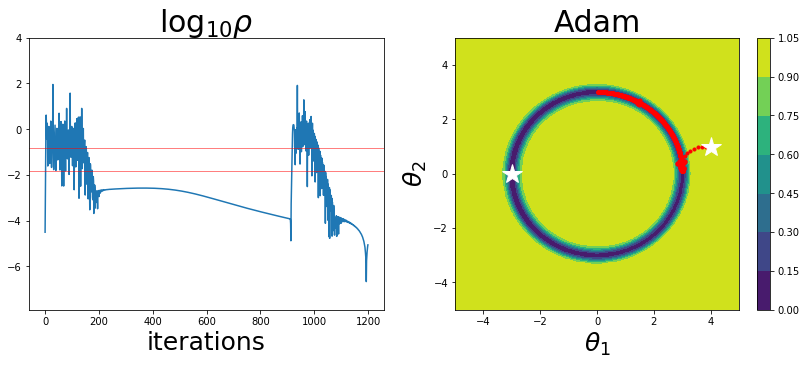

In [16]:
pg.do_Plots_final(d_res_Adam, pm.g_rhomin, pm.g_rhomax, g_sumd_line_freq)
#pg.do_plot_special(name, d_res_Adam)

#filename = None
filename = PATH_FIGS + "/2Dshell-Adam"
pg.do_plot_2Dshell_special(name, d_res_Adam, "Adam", filename, pm.g_ymin_2Dshell, pm.g_ymax_2Dshell)


### Neograd

In [17]:
# =======================================================
type_opt = "dp_GD_basic"  
#type_opt = "dp_GD_momentum"
#type_opt = "dp_GD_Nesterov"
#type_opt = "dp_RMSProp"
#type_opt = "dp_Adam" 

alpha = pm.g_alpha_Neo_init
print("alpha = ", alpha)

alpha = None


alpha =  0.01


In [18]:
d_res_Neograd = ao.do_Neograd(name, alpha, num, p_init.copy(), p_target, type_opt, rho_targ, b_print, g_rho_type)
#d_res_Neograd = ao.do_Neograd_dbl(name, alpha, num, p_init.copy(), p_target, type_opt, rho_targ, b_print, g_rho_type)


0 : alpha,rho,rerr =  1e-06 2.2204310744888013e-06 -0.999977795689255
1 : alpha,rho,rerr =  1.4567689488345768e-05 1.5242152844345764e-07 -0.9999984757847156
2 : alpha,rho,rerr =  0.00041459980909289585 0.0 -1.0
3 : alpha,rho,rerr =  0.0008291996181857917 2.677798460527774e-09 -0.9999999732220155
4 : alpha,rho,rerr =  0.06482083505864544 2.891111262884252e-08 -0.9999997108888737
5 : alpha,rho,rerr =  2.7954287032848777 1.5620656960078085e-06 -0.9999843793430399
6 : alpha,rho,rerr =  44.4655426136979 0.00833707503802256 -0.9166292496197744
7 : alpha,rho,rerr =  82.75041277322502 9.381043070239771 92.81043070239771
starting alpha =  44.4655426136979
0  ============================================
alpha,rho =  82.75041277322502 0.00833707503802256  ---------------
1  ============================================
alpha,rho =  0.12244630563706667 67.58097955074196  ---------------
1: cost,rho,dotp = 0.37437306369522877, 67.58097955074196, 0.9997874644168796
2  ===============================

alpha,rho =  0.012629846840027737 0.09771586517952152  ---------------
230: cost,rho,dotp = 0.08091191586518255, 0.09771586517952152, 0.9995019726744945
231  ============================================
alpha,rho =  0.01273096679532403 0.09686051954321231  ---------------
231: cost,rho,dotp = 0.0809075302230091, 0.09686051954321231, 0.9992322970662466
232  ============================================
alpha,rho =  0.01287894202272315 0.09548272153232296  ---------------
232: cost,rho,dotp = 0.08090464512954959, 0.09548272153232296, 0.9988252512613545
233  ============================================
alpha,rho =  0.013102602052113988 0.09334489008411008  ---------------
233: cost,rho,dotp = 0.08090272340593356, 0.09334489008411008, 0.9982224512432372
234  ============================================
alpha,rho =  0.01344751149517757 0.09012857551968498  ---------------
234: cost,rho,dotp = 0.08090141866359622, 0.09012857551968498, 0.9973552801131199
235  ==================================

alpha,rho =  0.061528179259333717 0.013058027012379058  ---------------
403: cost,rho,dotp = 0.08038127959508562, 0.013058027012379058, 0.9898687807552465
404  ============================================
alpha,rho =  0.14015579723567348 0.0037140862952269515  ---------------
404: cost,rho,dotp = 0.08038015396116932, 0.0037140862952269515, 0.9922993026849064
405  ============================================
alpha,rho =  0.6562461990758067 0.00020805447449056806  ---------------
405: cost,rho,dotp = 0.08037759878952047, 0.00020805447449056806, 0.9962625963314286
406  ============================================
alpha,rho =  2.098382622119462 0.0009565958231419769  ---------------
406: cost,rho,dotp = 0.0803656157391494, 0.0009565958231419769, 0.9999942145564993
407  ============================================
alpha,rho =  4.594713217189825 0.004350158540126181  ---------------
407: cost,rho,dotp = 0.08032733240691348, 0.004350158540126181, 0.9996739636850238
408  ======================

alpha,rho =  0.012257914982241087 0.09750169742006969  ---------------
659: cost,rho,dotp = 0.07928079269027147, 0.09750169742006969, 0.9999360989907375
660  ============================================
alpha,rho =  0.012327683600262663 0.0977553426007293  ---------------
660: cost,rho,dotp = 0.07922669837177584, 0.0977553426007293, 0.9999005402054592
661  ============================================
alpha,rho =  0.012393361858487403 0.0978970028939779  ---------------
661: cost,rho,dotp = 0.0791914794253672, 0.0978970028939779, 0.9998451723172362
662  ============================================
alpha,rho =  0.012459802166149033 0.09788405091101683  ---------------
662: cost,rho,dotp = 0.07916856690803785, 0.09788405091101683, 0.999759189987792
663  ============================================
alpha,rho =  0.012533803928016498 0.09765916367646621  ---------------
663: cost,rho,dotp = 0.07915365205349664, 0.09765916367646621, 0.9996262013030895
664  ====================================

alpha,rho =  2.514352705298534 0.09654047469257448  ---------------
709: cost,rho,dotp = 0.07890211018343678, 0.09654047469257448, 0.9972260732428575
710  ============================================
alpha,rho =  0.01408038904208267 17.85712523839916  ---------------
710: cost,rho,dotp = 0.08858984472410512, 17.85712523839916, 0.27353209027668407
711  ============================================
alpha,rho =  0.011591205789296392 0.1214747567943695  ---------------
711: cost,rho,dotp = 0.08456472193185072, 0.1214747567943695, -0.9345458770294297
712  ============================================
alpha,rho =  0.011689723949506087 0.09667127427196275  ---------------
712: cost,rho,dotp = 0.08260348175594023, 0.09667127427196275, 0.9999956822343349
713  ============================================
alpha,rho =  0.011817475397971705 0.0957454610181983  ---------------
713: cost,rho,dotp = 0.08131303117040481, 0.0957454610181983, 0.9999957870534317
714  ========================================

alpha,rho =  0.013185612077683567 0.09312612189060475  ---------------
867: cost,rho,dotp = 0.07798586032254376, 0.09312612189060475, 0.9980966253556681
868  ============================================
alpha,rho =  0.013550077606031682 0.0896672907752746  ---------------
868: cost,rho,dotp = 0.07798323643800092, 0.0896672907752746, 0.9971769846261072
869  ============================================
alpha,rho =  0.014125524401294332 0.08467375339472294  ---------------
869: cost,rho,dotp = 0.07798139550240825, 0.08467375339472294, 0.9959219658659881
870  ============================================
alpha,rho =  0.015042549510268082 0.07775575102717734  ---------------
870: cost,rho,dotp = 0.0779800460742321, 0.07775575102717734, 0.9943241705599024
871  ============================================
alpha,rho =  0.016524668238489155 0.06866806383768806  ---------------
871: cost,rho,dotp = 0.07797899542208594, 0.06866806383768806, 0.9924871785850715
872  =================================

alpha,rho =  0.012152741680196644 0.09645524704183475  ---------------
941: cost,rho,dotp = 0.07754057129445374, 0.09645524704183475, 0.9999280740661345
942  ============================================
alpha,rho =  0.012248277769328469 0.09691632978032824  ---------------
942: cost,rho,dotp = 0.07747603235408888, 0.09691632978032824, 0.9998879610130642
943  ============================================
alpha,rho =  0.012335276979524705 0.09720855435915142  ---------------
943: cost,rho,dotp = 0.07743375147725019, 0.09720855435915142, 0.9998255119983381
944  ============================================
alpha,rho =  0.012420156312737091 0.0972942951570411  ---------------
944: cost,rho,dotp = 0.07740610264074925, 0.0972942951570411, 0.9997285879360219
945  ============================================
alpha,rho =  0.012511328688491207 0.09711683305072455  ---------------
945: cost,rho,dotp = 0.07738802364320692, 0.09711683305072455, 0.9995788460493025
946  ================================

alpha,rho =  0.013686217833982006 0.08760711691148833  ---------------
1128: cost,rho,dotp = 0.07541124213176953, 0.08760711691148833, 0.9967617625995315
1129  ============================================
alpha,rho =  0.014381839590088836 0.08201174079399563  ---------------
1129: cost,rho,dotp = 0.07540895096846709, 0.08201174079399563, 0.9953804678398485
1130  ============================================
alpha,rho =  0.01548706629145025 0.07436714904635656  ---------------
1130: cost,rho,dotp = 0.07540723270175934, 0.07436714904635656, 0.9936793040098599
1131  ============================================
alpha,rho =  0.01727950009602096 0.06452855401860622  ---------------
1131: cost,rho,dotp = 0.07540585514372082, 0.06452855401860622, 0.9918164219036473
1132  ============================================
alpha,rho =  0.020277220558294787 0.05273403409393651  ---------------
1132: cost,rho,dotp = 0.07540465085331151, 0.05273403409393651, 0.990108848205882
1133  =======================

max index =  1200
final arclength (sumd_x) =  5.200815941609221
final distance (sumd_y) =  2.159625343900465


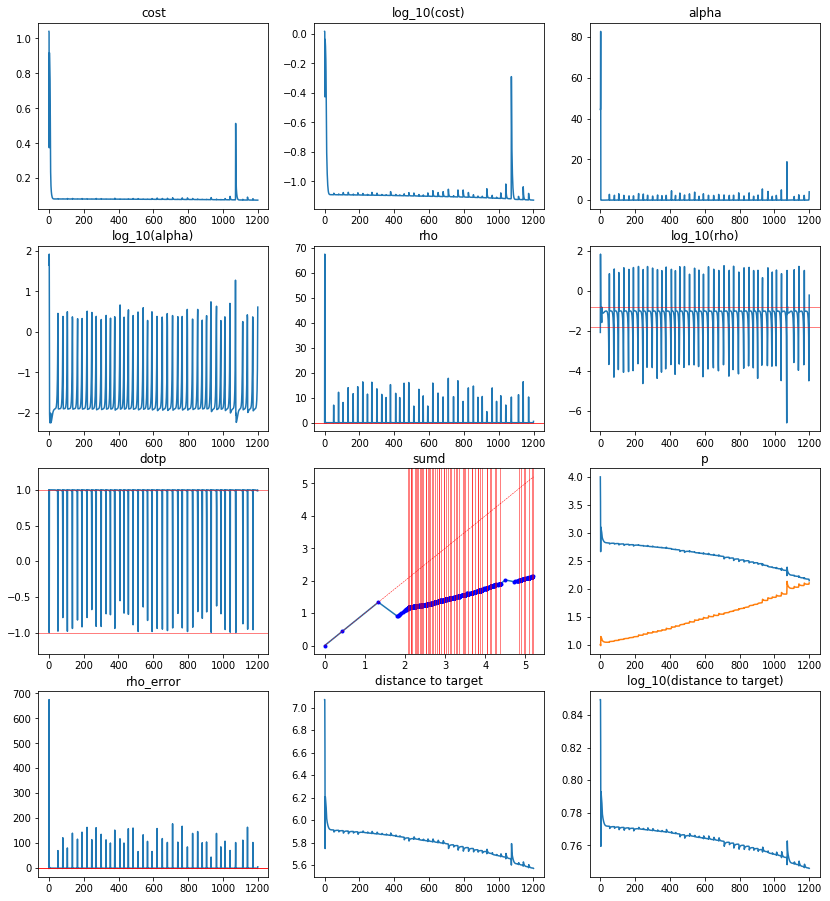

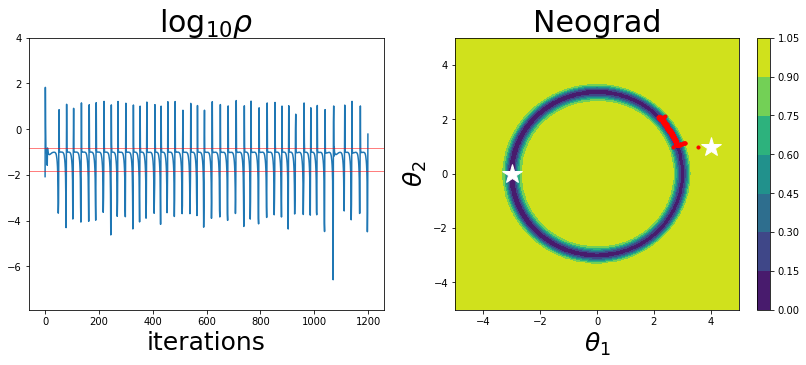

In [19]:
pg.do_Plots_final(d_res_Neograd, pm.g_rhomin, pm.g_rhomax, g_sumd_line_freq)
#pg.do_plot_special(name, d_res_Neograd)

filename = None
pg.do_plot_2Dshell_special(name, d_res_Neograd, "Neograd", filename, pm.g_ymin_2Dshell, pm.g_ymax_2Dshell)


### NeogradM

In [20]:
# =======================================================
#type_opt = "dp_GD_basic"  
type_opt = "dp_GD_momentum"
#type_opt = "dp_GD_Nesterov"
#type_opt = "dp_RMSProp"
#type_opt = "dp_Adam" 

alpha = pm.g_alpha_Neo_init
print("alpha = ", alpha)

alpha = None


alpha =  0.01


In [21]:
d_res_NeogradM = ao.do_Neograd(name, alpha, num, p_init.copy(), p_target, type_opt, rho_targ, b_print, g_rho_type)
#d_res_NeogradM = ao.do_Neograd_dbl(name, alpha, num, p_init.copy(), p_target, type_opt, rho_targ, b_print, g_rho_type)


0 : alpha,rho,rerr =  1e-06 2.2204310744888013e-06 -0.999977795689255
1 : alpha,rho,rerr =  1.4567689488345768e-05 1.5242152844345764e-07 -0.9999984757847156
2 : alpha,rho,rerr =  0.00041459980909289585 0.0 -1.0
3 : alpha,rho,rerr =  0.0008291996181857917 2.677798460527774e-09 -0.9999999732220155
4 : alpha,rho,rerr =  0.06482083505864544 2.891111262884252e-08 -0.9999997108888737
5 : alpha,rho,rerr =  2.7954287032848777 1.5620656960078085e-06 -0.9999843793430399
6 : alpha,rho,rerr =  44.4655426136979 0.00833707503802256 -0.9166292496197744
7 : alpha,rho,rerr =  82.75041277322502 9.381043070239771 92.81043070239771
starting alpha =  44.4655426136979
0  ============================================
alpha,rho =  82.75041277315652052 0.008337075038050169961  ---------------
1  ============================================
alpha,rho =  0.100943936591934923594 81.97660559610868295  ---------------
1: cost,rho,dotp = 0.2635227738798255, 81.97660559610868, 0.9999367993388713
2  ==================

190  ============================================
alpha,rho =  0.46623290290978355746 0.16790993399746296029  ---------------
190: cost,rho,dotp = 0.07944425024219377, 0.16790993399746296, 0.9929888477047468
191  ============================================
alpha,rho =  0.74461699088458001213 0.015370213831769422337  ---------------
191: cost,rho,dotp = 0.07943425908148077, 0.015370213831769423, 0.9927883737143123
192  ============================================
alpha,rho =  0.9183263740222607614 0.043225849621337060815  ---------------
192: cost,rho,dotp = 0.07941537425628549, 0.04322584962133706, 0.9878230696393328
193  ============================================
alpha,rho =  0.9128685908301824111 0.10059787172512036759  ---------------
193: cost,rho,dotp = 0.07939507538694653, 0.10059787172512037, 0.9995267242816956
194  ============================================
alpha,rho =  2.0568241389777879038 0.0038801133764552073527  ---------------
194: cost,rho,dotp = 0.0793728140001459,

alpha,rho =  0.47578793294945540397 0.116535931700497002334  ---------------
373: cost,rho,dotp = 0.07354844908416959, 0.116535931700497, 0.9910182408950847
374  ============================================
alpha,rho =  0.50750363801749062275 0.07724974479717577917  ---------------
374: cost,rho,dotp = 0.0735257035964403, 0.07724974479717578, 0.9992587240361449
375  ============================================
alpha,rho =  1.496930895031379062 0.0013211424033332014827  ---------------
375: cost,rho,dotp = 0.07349844437262501, 0.0013211424033332014, 0.9899028923323573
376  ============================================
alpha,rho =  0.8738812679126405688 0.17129682829876416116  ---------------
376: cost,rho,dotp = 0.0734210550806217, 0.17129682829876416, 0.9920738725515511
377  ============================================
alpha,rho =  1.2134081343274998277 0.026901847874890104571  ---------------
377: cost,rho,dotp = 0.0733696399437389, 0.026901847874890104, 0.9803532968041409
378  =======

alpha,rho =  0.2826631306595259727 0.299880405513245232  ---------------
596: cost,rho,dotp = 0.057919847518825965, 0.29988040551324524, 0.9690975241247907
597  ============================================
alpha,rho =  0.34580659323995957926 0.04464199364364513725  ---------------
597: cost,rho,dotp = 0.05789759335098847, 0.044641993643645135, 0.9907364603781282
598  ============================================
alpha,rho =  0.6719270660770635522 0.007015272349871741302  ---------------
598: cost,rho,dotp = 0.05786106245361066, 0.007015272349871741, 0.9827686011994818
599  ============================================
alpha,rho =  0.42672683512064741782 0.15746070103303705278  ---------------
599: cost,rho,dotp = 0.05779100924019126, 0.15746070103303705, 0.9909837004531983
600  ============================================
alpha,rho =  0.52025118322814323544 0.04526343535467082672  ---------------
600: cost,rho,dotp = 0.05775430587679075, 0.045263435354670825, 0.9964825298573368
601  ====

alpha,rho =  0.6444301132079098923 0.014868160096827739462  ---------------
638: cost,rho,dotp = 0.05443074628085773, 0.01486816009682774, 0.9833746752996898
639  ============================================
alpha,rho =  0.41788726351526823166 0.15421147507271768354  ---------------
639: cost,rho,dotp = 0.054363427903329244, 0.15421147507271768, 0.9934262487405484
640  ============================================
alpha,rho =  0.53342249251717139223 0.03766615087302888575  ---------------
640: cost,rho,dotp = 0.05432636121321113, 0.03766615087302889, 0.9957801407961121
641  ============================================
alpha,rho =  0.93214494724478186717 0.010723868956657268679  ---------------
641: cost,rho,dotp = 0.05427004325590506, 0.010723868956657268, 0.988481081456058
642  ============================================
alpha,rho =  0.7060014797572013223 0.13203158548128721524  ---------------
642: cost,rho,dotp = 0.054177837916220294, 0.1320315854812872, 0.9955623647162903
643  ====

alpha,rho =  2.794629905279597354 0.0004957299534859768619  ---------------
803: cost,rho,dotp = 0.04163610168202096, 0.0004957299534859769, 0.9918112583812159
804  ============================================
alpha,rho =  0.9522431654823151025 0.29347859943569202742  ---------------
804: cost,rho,dotp = 0.04144114554015456, 0.29347859943569204, 0.9921998787124043
805  ============================================
alpha,rho =  0.30038454064249194025 0.3170080469006707216  ---------------
805: cost,rho,dotp = 0.04131172738181967, 0.31700804690067075, 0.9099874500210104
806  ============================================
alpha,rho =  0.20790612749081898531 0.14448085021243867139  ---------------
806: cost,rho,dotp = 0.04129211461728704, 0.14448085021243867, 0.9975429797026613
807  ============================================
alpha,rho =  0.45235352119787250683 0.0044622844974397832258  ---------------
807: cost,rho,dotp = 0.04127592954767246, 0.004462284497439783, 0.9847723781544955
808  ==

alpha,rho =  1.409473864156570704 0.025366248309706148474  ---------------
1069: cost,rho,dotp = 0.02836475597547216, 0.025366248309706147, 0.9855750313495236
1070  ============================================
alpha,rho =  0.9265269976217334178 0.1521244246281538624  ---------------
1070: cost,rho,dotp = 0.028322479673280106, 0.15212442462815387, 0.9978455973450254
1071  ============================================
alpha,rho =  1.0847809472278142581 0.053218682531762923144  ---------------
1071: cost,rho,dotp = 0.02828895508661875, 0.05321868253176292, 0.9785774505254183
1072  ============================================
alpha,rho =  0.6226036098615218064 0.17423299994503549848  ---------------
1072: cost,rho,dotp = 0.028257521940105737, 0.1742329999450355, 0.9986525906945781
1073  ============================================
alpha,rho =  0.96433476655019391687 0.017375417153420274403  ---------------
1073: cost,rho,dotp = 0.028235710004057724, 0.017375417153420274, 0.9790508785076167


max index =  1200
final arclength (sumd_x) =  8.668384899595907571
final distance (sumd_y) =  6.7526505611365010965


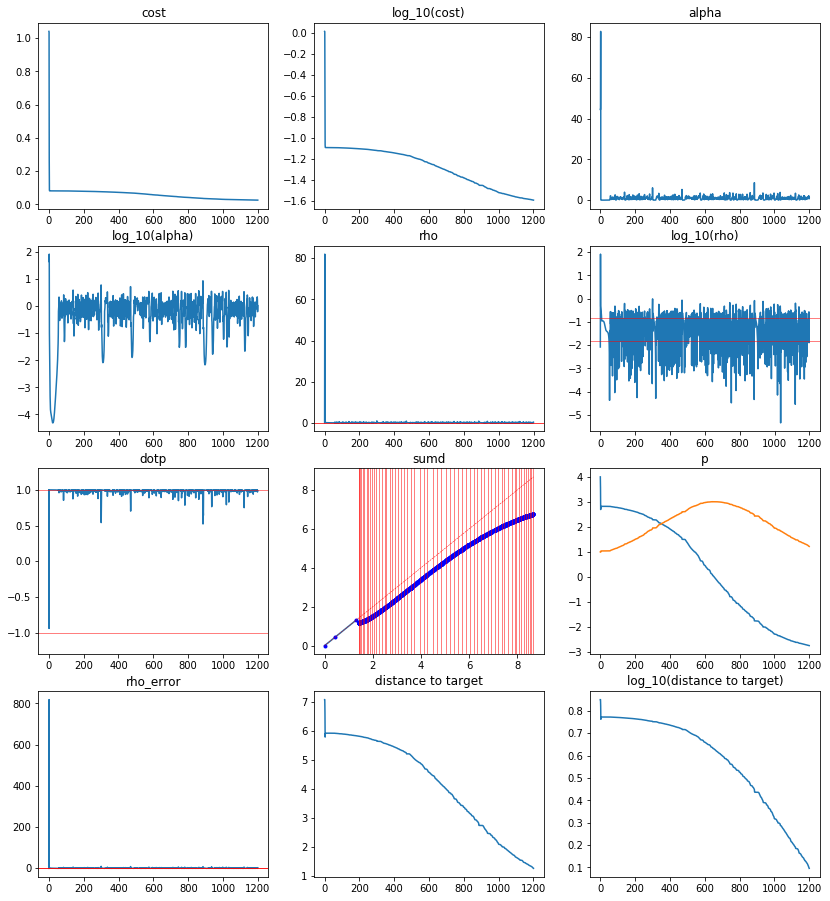

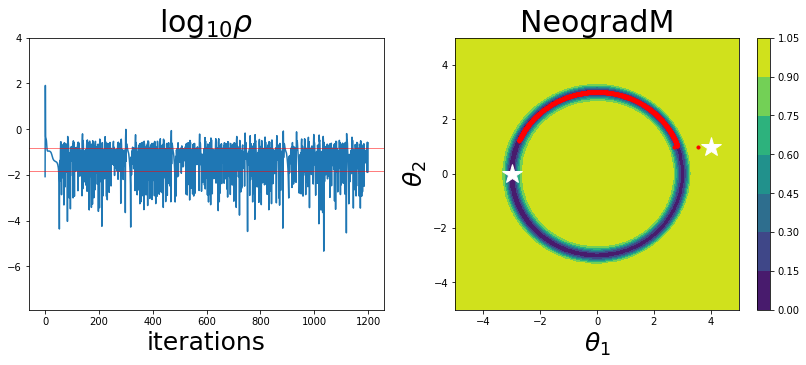

In [22]:
pg.do_Plots_final(d_res_NeogradM, pm.g_rhomin, pm.g_rhomax, g_sumd_line_freq)
#pg.do_plot_special(name, d_res_NeogradM)

#filename = None
filename = PATH_FIGS + "/2Dshell-NeogradM"
pg.do_plot_2Dshell_special(name, d_res_NeogradM, "NeogradM", filename, pm.g_ymin_2Dshell, pm.g_ymax_2Dshell)


### Neograd_dbl

In [23]:
# =======================================================
type_opt = "dp_GD_basic"  
#type_opt = "dp_GD_momentum"
#type_opt = "dp_GD_Nesterov"
#type_opt = "dp_RMSProp"
#type_opt = "dp_Adam" 

alpha = pm.g_alpha_Neo_init
print("alpha = ", alpha)

alpha = None


alpha =  0.01


In [24]:
#d_res_Neograd_dbl = ao.do_Neograd(name, alpha, num, p_init.copy(), p_target, type_opt, rho_targ, b_print, g_rho_type)
d_res_Neograd_dbl = ao.do_Neograd_dbl(name, alpha, num, p_init.copy(), p_target, type_opt, rho_targ, b_print, g_rho_type)


0 : alpha,rho,rerr =  1e-06 2.2204310744888013e-06 -0.999977795689255
1 : alpha,rho,rerr =  1.4567689488345768e-05 1.5242152844345764e-07 -0.9999984757847156
2 : alpha,rho,rerr =  0.00041459980909289585 0.0 -1.0
3 : alpha,rho,rerr =  0.0008291996181857917 2.677798460527774e-09 -0.9999999732220155
4 : alpha,rho,rerr =  0.06482083505864544 2.891111262884252e-08 -0.9999997108888737
5 : alpha,rho,rerr =  2.7954287032848777 1.5620656960078085e-06 -0.9999843793430399
6 : alpha,rho,rerr =  44.4655426136979 0.00833707503802256 -0.9166292496197744
7 : alpha,rho,rerr =  82.75041277322502 9.381043070239771 92.81043070239771
starting alpha =  44.4655426136979
0  ------------------------------
   j,rho =  0 0.00833707503802256
   j,rho =  1 9.381043070239771
1  ------------------------------
   j,rho =  0 1.0358886066428374
   j,rho =  1 1.294301755136865
1: cost,rho,dotp = 0.5498723823972784, 1.294301755136865, 0.9543679349504312
2  ------------------------------
   j,rho =  0 0.024441145562339783

192: cost,rho,dotp = 0.08147315019807433, 0.05014167496068499, 0.9597302685615562
193  ------------------------------
   j,rho =  0 0.011279376954457021
   j,rho =  1 0.01945915710960141
193: cost,rho,dotp = 0.08147225643486561, 0.01945915710960141, 0.9706328560023103
194  ------------------------------
   j,rho =  0 0.001313462890912712
   j,rho =  1 0.00390778106100582
194: cost,rho,dotp = 0.0814683396143951, 0.00390778106100582, 0.9758503684701647
195  ------------------------------
   j,rho =  0 0.18785168420423365
   j,rho =  1 0.1002343328596381
195: cost,rho,dotp = 0.08146396540399602, 0.1002343328596381, 0.9763532990330029
196  ------------------------------
   j,rho =  0 1.5955718795582796
   j,rho =  1 0.09991782284561768
196: cost,rho,dotp = 0.08146344262045128, 0.09991782284561768, 0.5786011642484101
197  ------------------------------
   j,rho =  0 0.05161788291536012
   j,rho =  1 0.06089829338874916
197: cost,rho,dotp = 0.08146300392139505, 0.06089829338874916, 0.9692008

389  ------------------------------
   j,rho =  0 0.050958864549404036
   j,rho =  1 0.06039160691838825
389: cost,rho,dotp = 0.08096877060371342, 0.06039160691838825, 0.9894049825870732
390  ------------------------------
   j,rho =  0 3.240347185633954
   j,rho =  1 0.10016597807106173
390: cost,rho,dotp = 0.08096810636563292, 0.10016597807106173, 0.6070928210700678
391  ------------------------------
   j,rho =  0 0.05671047555874456
   j,rho =  1 0.06534964138022113
391: cost,rho,dotp = 0.08096757007618458, 0.06534964138022113, 0.9728603893807622
392  ------------------------------
   j,rho =  0 0.02879673886154445
   j,rho =  1 0.039308694106313276
392: cost,rho,dotp = 0.0809669039717991, 0.039308694106313276, 0.974417254136063
393  ------------------------------
   j,rho =  0 0.0061428829227414645
   j,rho =  1 0.01233199116660655
393: cost,rho,dotp = 0.08096534892606237, 0.01233199116660655, 0.9738645126807672
394  ------------------------------
   j,rho =  0 0.00978561646835493

   j,rho =  1 0.07453928946489596
575: cost,rho,dotp = 0.0801611328784732, 0.07453928946489596, 0.8826251203380392
576  ------------------------------
   j,rho =  0 0.17425843089957527
   j,rho =  1 0.10003154784307526
576: cost,rho,dotp = 0.08015915562683593, 0.10003154784307526, 0.8186153651085923
577  ------------------------------
   j,rho =  0 0.03466649036569031
   j,rho =  1 0.045188122363122064
577: cost,rho,dotp = 0.08015666037267495, 0.045188122363122064, 0.8372216147900979
578  ------------------------------
   j,rho =  0 0.05893373840678545
   j,rho =  1 0.06725229439411325
578: cost,rho,dotp = 0.0801532534175922, 0.06725229439411325, 0.9077494967368336
579  ------------------------------
   j,rho =  0 0.22525095334585804
   j,rho =  1 0.09995498669078494
579: cost,rho,dotp = 0.08015145847549371, 0.09995498669078494, 0.8201955503722737
580  ------------------------------
   j,rho =  0 0.01716917860146404
   j,rho =  1 0.026660188931261507
580: cost,rho,dotp = 0.080148809604

779  ------------------------------
   j,rho =  0 0.256988371929509
   j,rho =  1 0.09973596214420574
779: cost,rho,dotp = 0.07914093826029972, 0.09973596214420574, 0.9567117688912659
780  ------------------------------
   j,rho =  0 0.5268603004403658
   j,rho =  1 0.10006632178222936
780: cost,rho,dotp = 0.07913953527227954, 0.10006632178222936, 0.6937318116934261
781  ------------------------------
   j,rho =  0 0.012708502798295173
   j,rho =  1 0.021279296899918625
781: cost,rho,dotp = 0.0791376493292373, 0.021279296899918625, 0.930802537428175
782  ------------------------------
   j,rho =  0 0.0006833073003536097
   j,rho =  1 0.0024183341406010944
782: cost,rho,dotp = 0.07912815501215559, 0.0024183341406010944, 0.9749314090033618
783  ------------------------------
   j,rho =  0 0.17490509343427543
   j,rho =  1 0.10045215307357715
783: cost,rho,dotp = 0.07911542736656697, 0.10045215307357715, 0.9827062059720616
784  ------------------------------
   j,rho =  0 2.49556976883211

   j,rho =  0 0.05175507806280478
   j,rho =  1 0.0610179920248198
1001: cost,rho,dotp = 0.07795907754959323, 0.0610179920248198, 0.9816149050174183
1002  ------------------------------
   j,rho =  0 0.02990749704823492
   j,rho =  1 0.04043993024586103
1002: cost,rho,dotp = 0.07795768786690527, 0.04043993024586103, 0.9780323308686981
1003  ------------------------------
   j,rho =  0 0.007937964761176678
   j,rho =  1 0.01494612104415857
1003: cost,rho,dotp = 0.07795469199819156, 0.01494612104415857, 0.9748815342496395
1004  ------------------------------
   j,rho =  0 0.005435899955621693
   j,rho =  1 0.011309056065146077
1004: cost,rho,dotp = 0.07794482917240805, 0.011309056065146077, 0.9776069890924604
1005  ------------------------------
   j,rho =  0 0.2889118216302817
   j,rho =  1 0.10025862167647924
1005: cost,rho,dotp = 0.0779390957372174, 0.10025862167647924, 0.9446719962466296
1006  ------------------------------
   j,rho =  0 0.3163935487928236
   j,rho =  1 0.09994373816

max index =  1200
final arclength (sumd_x) =  2.304952906132275
final distance (sumd_y) =  1.8916646348620008


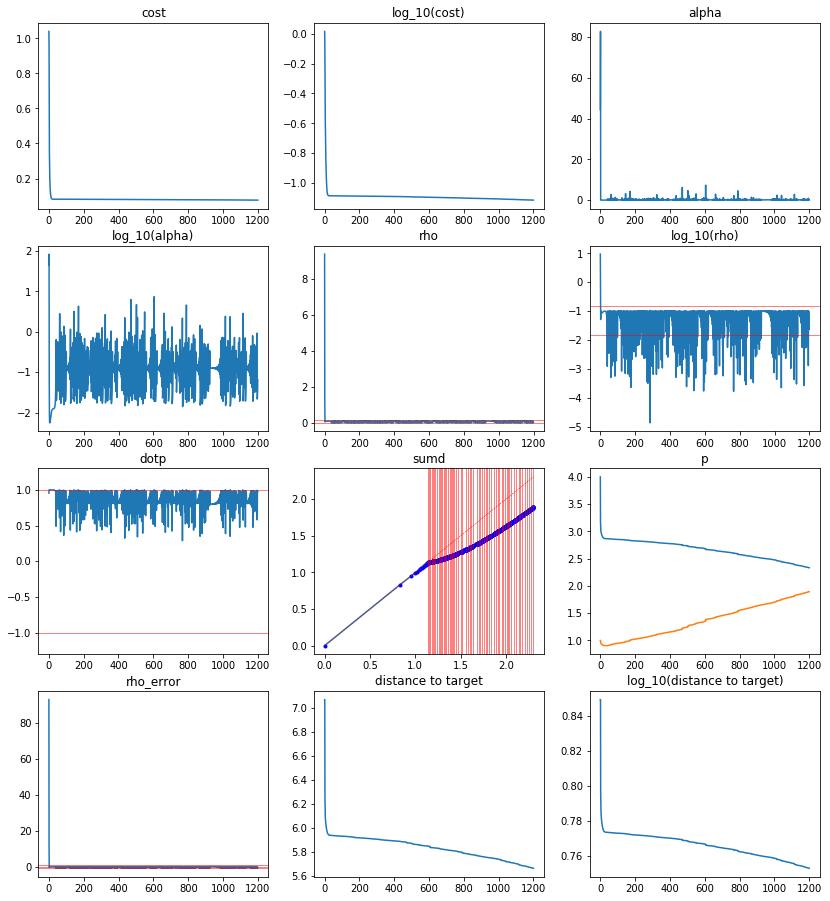

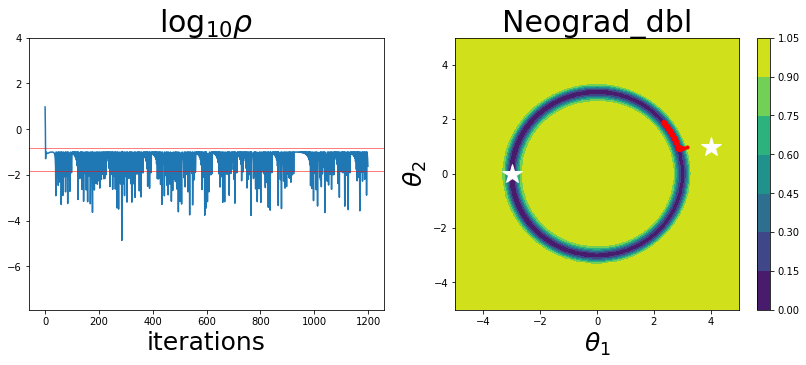

In [25]:
pg.do_Plots_final(d_res_Neograd_dbl, pm.g_rhomin, pm.g_rhomax, g_sumd_line_freq)
#pg.do_plot_special(name, d_res_Neograd_dbl)

filename = None
pg.do_plot_2Dshell_special(name, d_res_Neograd_dbl, "Neograd_dbl", filename, pm.g_ymin_2Dshell, pm.g_ymax_2Dshell)


### NeogradM_dbl

In [26]:
# =======================================================
#type_opt = "dp_GD_basic"  
type_opt = "dp_GD_momentum"
#type_opt = "dp_GD_Nesterov"
#type_opt = "dp_RMSProp"
#type_opt = "dp_Adam" 

alpha = pm.g_alpha_Neo_init
print("alpha = ", alpha)

alpha = None

num = 1200


alpha =  0.01


In [27]:
#d_res_NeogradM_dbl = ao.do_Neograd(name, alpha, num, p_init.copy(), p_target, type_opt, rho_targ, b_print, g_rho_type)
d_res_NeogradM_dbl = ao.do_Neograd_dbl(name, alpha, num, p_init.copy(), p_target, type_opt, rho_targ, b_print, g_rho_type)


0 : alpha,rho,rerr =  1e-06 2.2204310744888013e-06 -0.999977795689255
1 : alpha,rho,rerr =  1.4567689488345768e-05 1.5242152844345764e-07 -0.9999984757847156
2 : alpha,rho,rerr =  0.00041459980909289585 0.0 -1.0
3 : alpha,rho,rerr =  0.0008291996181857917 2.677798460527774e-09 -0.9999999732220155
4 : alpha,rho,rerr =  0.06482083505864544 2.891111262884252e-08 -0.9999997108888737
5 : alpha,rho,rerr =  2.7954287032848777 1.5620656960078085e-06 -0.9999843793430399
6 : alpha,rho,rerr =  44.4655426136979 0.00833707503802256 -0.9166292496197744
7 : alpha,rho,rerr =  82.75041277322502 9.381043070239771 92.81043070239771
starting alpha =  44.4655426136979
0  ------------------------------
   j,rho =  0 0.008337075038050169961
   j,rho =  1 9.381043070134792365
1  ------------------------------
   j,rho =  0 0.9860721716575765689
   j,rho =  1 0.7066623516091848596
1: cost,rho,dotp = 0.786850107870452, 0.7066623516091849, 0.9549209804008302
2  ------------------------------
   j,rho =  0 0.1039

182  ------------------------------
   j,rho =  0 0.11445549078512175228
   j,rho =  1 0.10011808832888218319
182: cost,rho,dotp = 0.08025492529130615, 0.10011808832888218, 0.9999905994428587
183  ------------------------------
   j,rho =  0 0.0036160348343852525395
   j,rho =  1 0.008843215691515920148
183: cost,rho,dotp = 0.08022202148400873, 0.00884321569151592, 0.9869179841615532
184  ------------------------------
   j,rho =  0 0.19714343233907878045
   j,rho =  1 0.09757511119397578848
184: cost,rho,dotp = 0.08019364132211042, 0.09757511119397579, 0.998316928165985
185  ------------------------------
   j,rho =  0 0.0852266097347042831
   j,rho =  1 0.08860752031075322943
185: cost,rho,dotp = 0.08016059570730802, 0.08860752031075322, 0.9832791094472726
186  ------------------------------
   j,rho =  0 0.0009488121123429893616
   j,rho =  1 0.0058152250376858193966
186: cost,rho,dotp = 0.08005603878751454, 0.005815225037685819, 0.9973347461475572
187  -----------------------------

   j,rho =  1 0.09819497917337466325
348: cost,rho,dotp = 0.07280312601162924, 0.09819497917337466, 0.9804136504297142
349  ------------------------------
   j,rho =  0 0.041499203829709432474
   j,rho =  1 0.05236019385625195619
349: cost,rho,dotp = 0.07271885444427843, 0.05236019385625196, 0.9987967488387858
350  ------------------------------
   j,rho =  0 0.23455943333956291034
   j,rho =  1 0.10193336468353959639
350: cost,rho,dotp = 0.07266583768541302, 0.1019333646835396, 0.9781490564143198
351  ------------------------------
   j,rho =  0 0.124700494989372497304
   j,rho =  1 0.10027881825179098822
351: cost,rho,dotp = 0.07263240026993632, 0.10027881825179098, 0.9999970372850828
352  ------------------------------
   j,rho =  0 0.001648274171649972303
   j,rho =  1 0.004484089058232907187
352: cost,rho,dotp = 0.0725303250079857, 0.004484089058232907, 0.9897108215882382
353  ------------------------------
   j,rho =  0 0.43471611794170972345
   j,rho =  1 0.094158533705212199035

   j,rho =  0 0.114162161973708792845
   j,rho =  1 0.0993100757036424007
515: cost,rho,dotp = 0.05601769982656141, 0.0993100757036424, 0.9997554907283988
516  ------------------------------
   j,rho =  0 0.08778659583940294647
   j,rho =  1 0.090549630919231790564
516: cost,rho,dotp = 0.05586428285466795, 0.0905496309192318, 0.9811353925209073
517  ------------------------------
   j,rho =  0 0.024967869596514406781
   j,rho =  1 0.033725600427172477188
517: cost,rho,dotp = 0.05566667407337598, 0.03372560042717248, 0.9990915556020008
518  ------------------------------
   j,rho =  0 0.39894870430906262344
   j,rho =  1 0.095427298779204714694
518: cost,rho,dotp = 0.055587520942049724, 0.09542729877920471, 0.9819869275950451
519  ------------------------------
   j,rho =  0 0.13536685681323216115
   j,rho =  1 0.0996087308365552252
519: cost,rho,dotp = 0.055539878960150627, 0.09960873083655522, 0.9999823787695467
520  ------------------------------
   j,rho =  0 0.006086601807867444986

   j,rho =  0 0.041384779543038023287
   j,rho =  1 0.052614928889227748977
737: cost,rho,dotp = 0.03262479881205695, 0.05261492888922775, 0.999691101728841
738  ------------------------------
   j,rho =  0 0.35507775100077197322
   j,rho =  1 0.10314694993248135816
738: cost,rho,dotp = 0.03257851478934692, 0.10314694993248136, 0.9791623134635465
739  ------------------------------
   j,rho =  0 0.14349831599633891632
   j,rho =  1 0.100333106580168737935
739: cost,rho,dotp = 0.03255355859322116, 0.10033310658016874, 0.9999118047029476
740  ------------------------------
   j,rho =  0 0.00910973235210883266
   j,rho =  1 0.016231904926833502235
740: cost,rho,dotp = 0.032508685709662616, 0.0162319049268335, 0.993708249610691
741  ------------------------------
   j,rho =  0 0.14560546112140479466
   j,rho =  1 0.099117254125213140495
741: cost,rho,dotp = 0.03245262188916947, 0.09911725412521315, 0.9859913839241593
742  ------------------------------
   j,rho =  0 0.064953633182985079284

   j,rho =  1 0.026116149956876965677
959: cost,rho,dotp = 0.02512975142016682, 0.026116149956876965, 0.9900833274038113
960  ------------------------------
   j,rho =  0 0.053994568137998338676
   j,rho =  1 0.06366183809676852076
960: cost,rho,dotp = 0.025090743069144387, 0.06366183809676852, 0.9999916552424342
961  ------------------------------
   j,rho =  0 0.67680584012130196655
   j,rho =  1 0.10205827497984359252
961: cost,rho,dotp = 0.025081973085305524, 0.10205827497984359, 0.9730331159308262
962  ------------------------------
   j,rho =  0 0.21000176527256049379
   j,rho =  1 0.10014024490776126406
962: cost,rho,dotp = 0.025078579693152594, 0.10014024490776126, 0.998284048377103
963  ------------------------------
   j,rho =  0 0.08768466685386278034
   j,rho =  1 0.090609001229528386575
963: cost,rho,dotp = 0.02507574291915037, 0.09060900122952839, 0.9993278963744808
964  ------------------------------
   j,rho =  0 0.018717338707832777081
   j,rho =  1 0.02840596159436066

1160: cost,rho,dotp = 0.023532054586333846, 0.10007243230203222, 0.9999715310906547
1161  ------------------------------
   j,rho =  0 0.0050841770096250584717
   j,rho =  1 0.010610644722508188024
1161: cost,rho,dotp = 0.02352910889368146, 0.010610644722508188, 0.9926860058891775
1162  ------------------------------
   j,rho =  0 0.24148235854062299687
   j,rho =  1 0.099523004655762261905
1162: cost,rho,dotp = 0.023526654512259448, 0.09952300465576226, 0.9864721285312325
1163  ------------------------------
   j,rho =  0 0.08574034024447983698
   j,rho =  1 0.08911631151332835422
1163: cost,rho,dotp = 0.02352458878907855, 0.08911631151332836, 0.99973086820777
1164  ------------------------------
   j,rho =  0 0.02389729845082099326
   j,rho =  1 0.03406696065219352031
1164: cost,rho,dotp = 0.023521029348634582, 0.03406696065219352, 0.9854748554017756
1165  ------------------------------
   j,rho =  0 0.12407405246237875208
   j,rho =  1 0.10017563763867195795
1165: cost,rho,dotp = 0.

max index =  1200
final arclength (sumd_x) =  9.2864911158586962514
final distance (sumd_y) =  7.00149173581600143


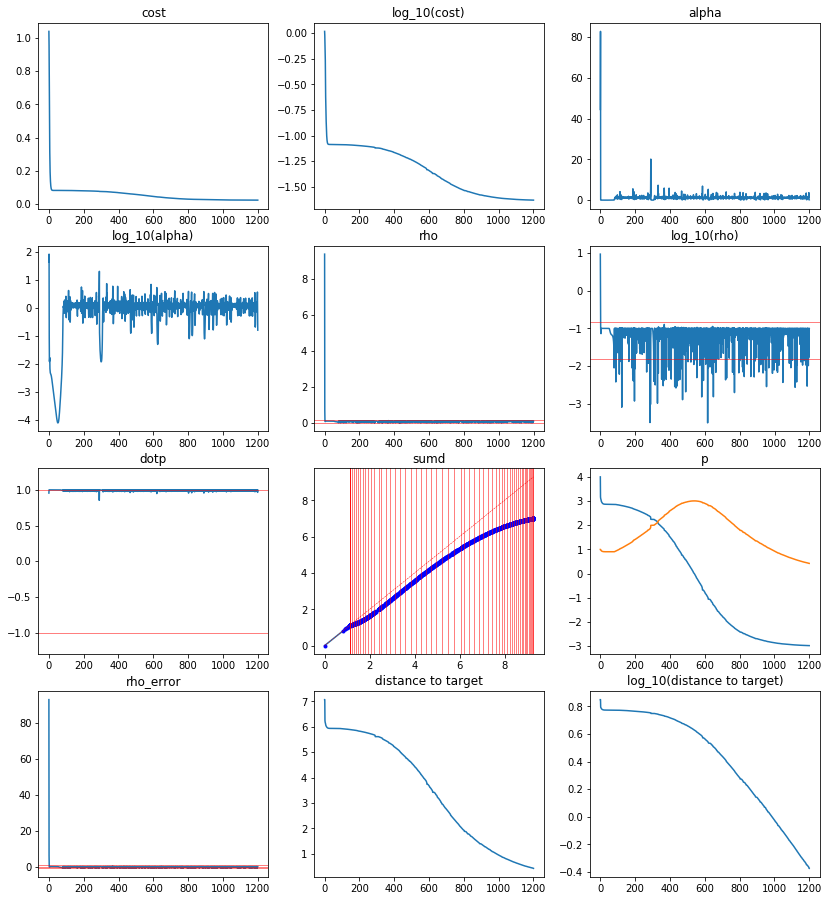

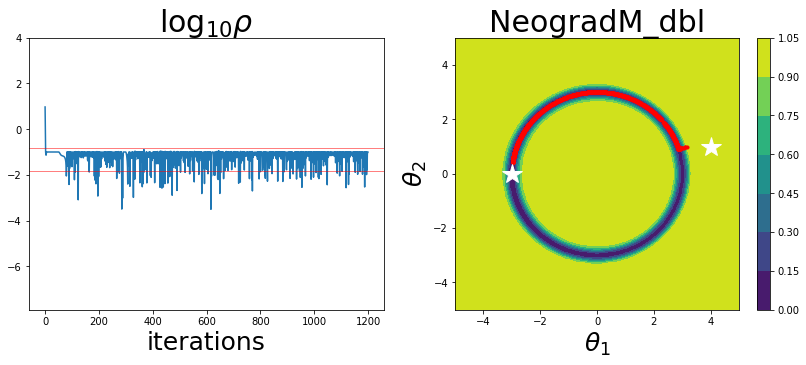

In [28]:
pg.do_Plots_final(d_res_NeogradM_dbl, pm.g_rhomin, pm.g_rhomax, g_sumd_line_freq)
#pg.do_plot_special(name, d_res_NeogradM_dbl)

#filename = None
filename = PATH_FIGS + "/2Dshell-NeogradM_dbl"
pg.do_plot_2Dshell_special(name, d_res_NeogradM_dbl, "NeogradM_dbl", filename, pm.g_ymin_2Dshell, pm.g_ymax_2Dshell)


# Combo plots

In [29]:

# ====================================================================
# Same as "get_dotp_sumd_plot", except it now includes different colored vertical lines every "vert_space_major" iterations
def get_dotp_sumd_plot_2( dict_, title_1, title_2, filename, vert_space_minor, vert_space_major, scale_ ):
    nrows = 1
    ncols = 2
    plt.figure(1, figsize=(6*ncols, 5*nrows))

    size_title = 25
    size_label = 20

    # dotp --------------------------------
    idx = 1
    plt.subplot(nrows, ncols, idx)
    plt.plot( dict_["dotp"] )
    plt.title( title_1, fontsize= size_title)
    plt.ylim(-1.3, 1.3)
    plt.axhline(y=1, color='red', linewidth=0.5)
    plt.axhline(y= -1, color='red', linewidth=0.5)
    plt.xlabel(r'iterations', fontsize= size_label)

    # sumd --------------------------------
    idx += 1    
    plt.subplot(nrows, ncols, idx)
    
    # blue line
    plt.plot( dict_["sumd_x"], dict_["sumd_y"] )
    # blue dots
    plt.plot( dict_["sumd_x"], dict_["sumd_y"], 'bo', markersize=3)
    
    # ideal line (dashed)
    if scale_ is None:
        mx = dict_["sumd_x"][-1]
    else:
        mx = scale_  #use this to have a comparable scale for both
    plt.plot( [0,mx], [0,mx], 'r--', linewidth=0.5)
    
    # vertical lines
    plt.title(title_2, fontsize= size_title)
    plt.xlabel(r'arclength', fontsize= size_label)
    plt.ylabel(r'distance', fontsize= size_label)
    sumd_step = vert_space_minor
    n = len(dict_["sumd_x"]) // sumd_step
    for i in range(n):
        ix = (i+1)*sumd_step
        if ix < len(dict_["sumd_x"]):
            if vert_space_major is not None and (ix%vert_space_major==0 and ix != 0):
                v = dict_["sumd_x"][ix]
                plt.axvline(x=v, color='purple', linewidth=1.0)
            else:
                v = dict_["sumd_x"][ix]
                plt.axvline(x=v, color='red', linewidth=0.5)
            
    # save/show plot ------------------------
    if filename is not None:
        plt.savefig( filename )
    else:
        plt.show()
        


In [30]:
vert_space_minor = 50
vert_space_major = None
mx_scale   = None


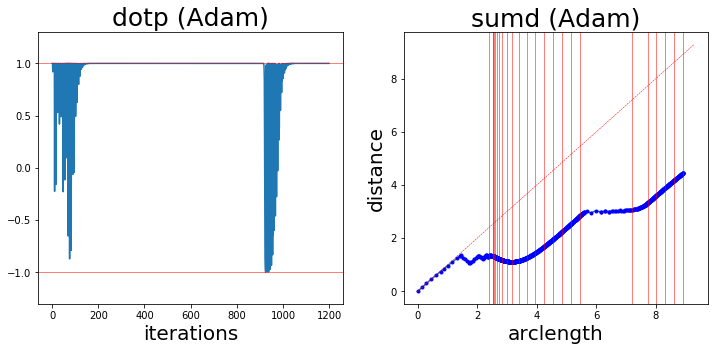

In [31]:
mx_scale = max( d_res_Adam["sumd_x"][-1], d_res_NeogradM_dbl["sumd_x"][-1])

filename = PATH_FIGS + "/2Dshell-Adam-dotp-sumd.png"
get_dotp_sumd_plot_2(d_res_Adam, "dotp (Adam)", "sumd (Adam)", filename, vert_space_minor, vert_space_major, mx_scale )


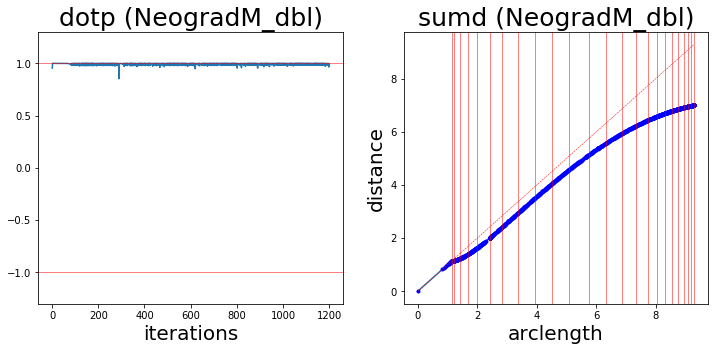

In [32]:
filename = PATH_FIGS + "/2Dshell-NeogradM_dbl-dotp-sumd.png"
#pg.get_dotp_sumd_plot(d_res_NeogradM_dbl, "dotp (NeogradM_dbl)", "sumd (NeogradM_dbl)", filename, vert_space_minor, mx_scale )
get_dotp_sumd_plot_2(d_res_NeogradM_dbl, "dotp (NeogradM_dbl)", "sumd (NeogradM_dbl)", filename, vert_space_minor, vert_space_major, mx_scale )



# Cross-section

In [33]:
# initial values
max = 5.0
theta2 = max
theta1 = -max

num = 500
dtheta = (2.0*max)/num
name = "2Dshell"
list_theta = []
list_cost = []

for i in range(num):
    theta = theta1 + i*dtheta
    p = np.array( [theta, 0.0] )
    cost  = cg.get_cost(name, p)
    print("i,theta = ", i, theta, cost )
    list_theta.append( theta )
    list_cost.append( cost )
    
    

i,theta =  0 -5.0 0.95
i,theta =  1 -4.98 0.9502
i,theta =  2 -4.96 0.9504
i,theta =  3 -4.94 0.9506
i,theta =  4 -4.92 0.9508
i,theta =  5 -4.9 0.951
i,theta =  6 -4.88 0.9512
i,theta =  7 -4.86 0.9514
i,theta =  8 -4.84 0.9516
i,theta =  9 -4.82 0.9518
i,theta =  10 -4.8 0.952
i,theta =  11 -4.78 0.9522
i,theta =  12 -4.76 0.9524
i,theta =  13 -4.74 0.9525999999999998
i,theta =  14 -4.72 0.9527999999999998
i,theta =  15 -4.7 0.9529999999999995
i,theta =  16 -4.68 0.9531999999999994
i,theta =  17 -4.66 0.9533999999999989
i,theta =  18 -4.64 0.953599999999998
i,theta =  19 -4.62 0.9537999999999967
i,theta =  20 -4.6 0.953999999999994
i,theta =  21 -4.58 0.9541999999999898
i,theta =  22 -4.56 0.9543999999999823
i,theta =  23 -4.54 0.9545999999999694
i,theta =  24 -4.52 0.9547999999999471
i,theta =  25 -4.5 0.9549999999999093
i,theta =  26 -4.48 0.9551999999998444
i,theta =  27 -4.46 0.955399999999734
i,theta =  28 -4.4399999999999995 0.9555999999995465
i,theta =  29 -4.42 0.955799999999

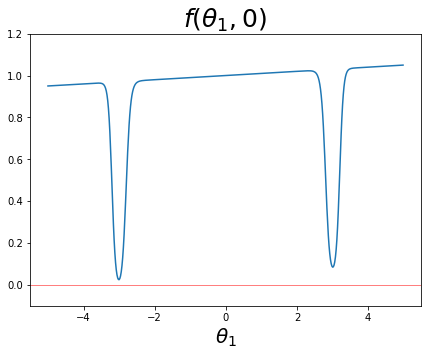

In [34]:
nrows = 1
ncols = 1
plt.figure(1, figsize=(7*ncols, 5*nrows))

    
size_title = 25
size_label = 20

#plt.tight_layout()

plt.plot( list_theta, list_cost )
#plt.title(r'Cross-section', fontsize= size_title)
plt.title(r'$f(\theta_1, 0)$', fontsize= size_title)
#plt.ylabel(r'$f$', fontsize= size_label)
plt.xlabel(r'$\theta_1$', fontsize= size_label)
plt.axhline(y=0, color='red', linewidth=0.5)
#plt.xlim((0,4000))
plt.ylim((-0.1, 1.2))

#plt.tight_layout()

plt.savefig(PATH_FIGS + "/2Dshell-profile.png")
#plt.show()


